# 1. More Supervised Learning Models

## 1.1 Review: KNeighborsClassifier
- Using Euclidean geometry, calculates k-nearest neighbors for each data point (k = 5 by default)
- Assumes that similar data points are close to one another
- Pros: simple, versatile (KNN can also be used for regression!)
- Cons: slows significantly as data volume increases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42)

## 1.1.1 Predicting the sex of abalone from physical measurements

In [2]:
abalone_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone_cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 
                'Shucked_Weight', 'Visecra_Weight', 'Shell_Weight', 'Rings']
abalone = pd.read_csv(abalone_url, names=abalone_cols) #when reading from url names are columns
abalone.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_Weight      4177 non-null float64
Shucked_Weight    4177 non-null float64
Visecra_Weight    4177 non-null float64
Shell_Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
features = abalone[[x for x in abalone if x != 'Sex']]
features.head(1)

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [5]:
target = abalone['Sex']
target.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    features,
    target, 
    test_size = .1,
    random_state = 42
)

train_X.head()

#with all data we do not know if it is doing it correctly, or if it is an accurate model

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings
3789,0.645,0.510,0.155,1.1290,0.5015,0.2400,0.3420,10
1370,0.615,0.470,0.165,1.1280,0.4465,0.2195,0.3400,10
2384,0.440,0.345,0.105,0.4285,0.1650,0.0830,0.1320,11
1200,0.720,0.550,0.200,1.9965,0.9035,0.4690,0.5215,10
4046,0.600,0.460,0.155,0.6655,0.2850,0.1490,0.2690,11


In [9]:
target.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

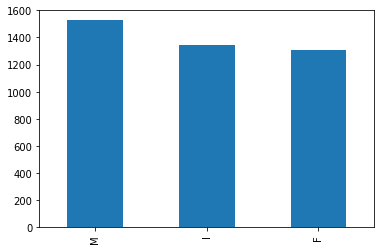

In [11]:
target.value_counts().plot(kind = 'bar')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y.values.ravel())

knn.score(test_X, test_y) #taking the test input data and makes a prediction against the train data , in this case is not a great result but it is better than 50/50

0.5526315789473685

In [12]:
new_obs = np.array([[0.5, 0.3, 0.05, 0.6, 0.2, 0.1, 0.1, 8]])

knn.predict(new_obs)

array(['I'], dtype=object)

# 1.2 Naive Bayes Classifiers
- Assume that all features are independent
- Assume that all features are equally important

## 1.2.1 Review: Bayes' Theorem
Companies A,B and C supply 25, 35 and 40% of the notebooks to a school, respectively.

Past experience shows that 5, 4 and 2% of the notebooks produced by these companies are defective.

If a notebook was found to be defective, what is the probability that the notebook was supplied by A?

In [16]:
def bayes_theorem(priors: list, likelihoods: list) -> np.array: #list lits, should return an array
    priors_x_likelihoods = np.multiply(priors, likelihoods)
    marginal_prob = sum(priors_x_likelihoods)
    return priors_x_likelihoods / marginal_prob # posterior probabilities

company = [.25, .35, .40] # probability notebook was supplied by each company
defective = [.05, .04, .02] #probability of selecting a defective 

bayes_theorem(company, defective)[0]

0.36231884057971014

## 1.2.1 Review: BernoulliNB
- Used when all features are binary
- Common use case : text classification with "bag of words" model where each feature is a binary value for wheter a word appears in the document

In [22]:
titanic = sns.load_dataset('titanic').dropna(how = 'any')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [23]:
titanic['who'].unique()


array(['woman', 'man', 'child'], dtype=object)

In [24]:
features = pd.get_dummies(titanic[['sex', 'class', 'who', 'deck', 'alone']])
features.head()

,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,False,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,False,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
6,True,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
10,False,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
11,True,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [25]:
target = titanic['survived']
target.head()

1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64

In [26]:
train_X, test_X, train_y, test_y = train_test_split(
    features,
    target, 
    test_size = .8,
    random_state = 42
)

train_X.head()


,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
802,False,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
796,True,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
327,True,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
299,False,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
536,True,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0


In [28]:
train_X.shape[0]

36

In [27]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB().fit(train_X, train_y)
bernoulli.score(test_X, test_y) 

# our training data is very little, this model is not as accurate even it is hitting 72%

0.726027397260274

# 1.3 confusion_matrix()

In [29]:
predictions = bernoulli.predict(test_X)
predictions[:5]

array([0, 1, 1, 1, 0])

In [30]:
from sklearn import metrics
pd.DataFrame(metrics.confusion_matrix(test_y, predictions))

,0,1
0,45,5
1,35,61


In [31]:
(45 + 61) / (45 + 5 + 35 + 61)

0.726027397260274

## 1.3.1 MultinomialNB
- Similar to Bernoulli Naive Bayes
- Use when features are discrete
- Common use case: text classification using "bag of words" model where each feature is the number of times a word appears

## 1.3.2 GaussianNB
- Use when features are continous
- Assumes that all features are normally distributed (Gaussian Distribution)

In [32]:
sns.load_dataset('iris').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
features = pd.DataFrame(
    data = iris['data'],
    columns = iris['feature_names']
)

features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1.3.3 np.apply_along_axis()

In [36]:
target = np.apply_along_axis(
    lambda x: iris['target_names'][x], #function
    0, #axic (0 = columnwise)
    iris['target'] #data
)

target[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [37]:
train_X, test_X, train_y, test_y = train_test_split(
    features,
    target, 
    test_size = .4,
    random_state = 42
)

train_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


In [38]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB().fit(train_X, train_y)
gaussian.score(test_X, test_y)

0.9666666666666667

In [40]:
pd.DataFrame(
    data = metrics.confusion_matrix(test_y, gaussian.predict(test_X)),
    columns = iris['target_names'],
    index = iris['target_names'])

,setosa,versicolor,virginica
setosa,23,0,0
versicolor,0,18,1
virginica,0,1,17
